In [1]:
import sys
import os
sys.path.append(os.path.abspath('../'))

import cv2
import matplotlib.pyplot as plt
from modules.inference.preprocessing import capture_video
from modules.inference.object_detection import Model
from modules.inference.nms import filter
import random

In [2]:
weights_path = '../datasets/yolo_model_1/yolov4-tiny-logistics_size_416_1.weights'
config_path = '../datasets/yolo_model_1/yolov4-tiny-logistics_size_416_1.cfg'
class_names_path = '../datasets/yolo_model_1/logistics.names'

yolo_model = Model(weights_path, config_path, class_names_path)

In [3]:
def show_image_with_boxes(image, bboxes, class_ids, scores, classes):
    for bbox, class_id, score in zip(bboxes, class_ids, scores):
        x, y, w, h = bbox
        label = f"{classes[class_id]}: {score:.2f}"
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

In [4]:
def select_images(folder_path, num_images=5):
    all_files = os.listdir(folder_path)
    
    image_files = [file for file in all_files if file.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]
    
    if len(image_files) < num_images:
        raise ValueError(f"Not enough images in the folder. Found {len(image_files)}, but need {num_images}.")
    
    selected_images = random.sample(image_files, num_images)
    final_images = []
    
    for img_file in selected_images:
        img_file = os.path.join(folder_path, img_file)
        final_images.append(img_file)

    return final_images

image_files = select_images('../datasets/logistics')

images = [cv2.imread(img_file) for img_file in image_files]

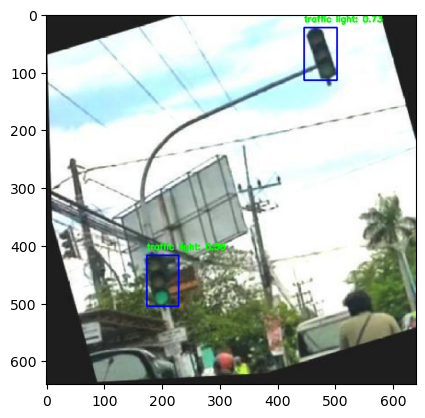

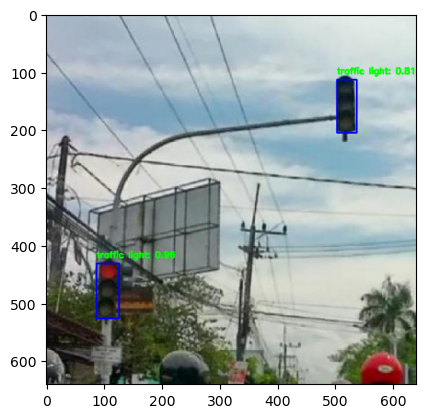

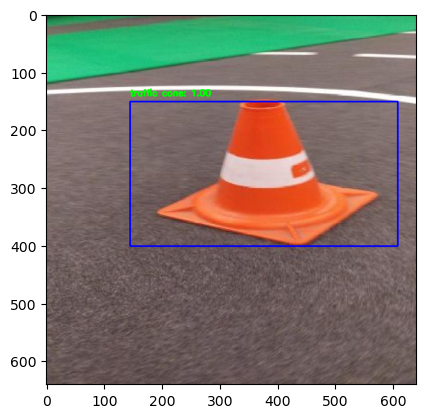

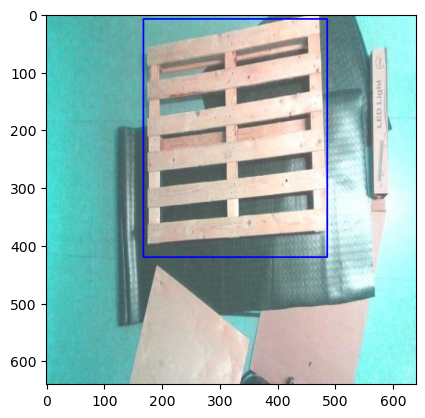

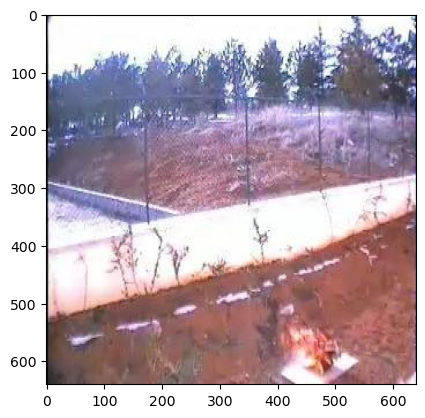

In [5]:
for image in images:
    preprocessed_frame = image
    
    predictions = yolo_model.predict(preprocessed_frame)
    
    bboxes, class_ids, scores = yolo_model.post_process(preprocessed_frame, predictions, score_threshold=0.5)
    
    nms_bboxes, nms_class_ids, nms_scores = filter(bboxes, class_ids, scores, nms_iou_threshold=0.4)
    
    show_image_with_boxes(preprocessed_frame, nms_bboxes, nms_class_ids, nms_scores, yolo_model.classes)